In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Friday6661/Dataset/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Mengecheck Ukuran DataFrame
df.shape

(7043, 21)

In [ ]:
# Mengecheck nama kolom pada Dataframe
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# Mengecheck tipe data dari setiap kolom
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#Mengecheck jumlah missing value pada DataFrame
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# Mencari ringkasan informasi statistik pada kolom dengan tipe data numeric(int64, float64)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#Exploratory Data

## Distribusi Data Target

In [ ]:
df['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

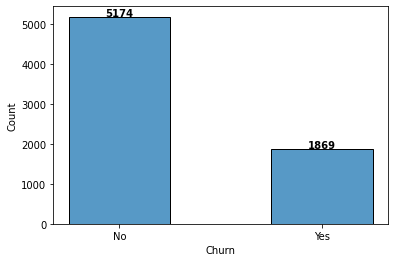

In [ ]:
fig, ax = plt.subplots()

sns.histplot(df['Churn'], shrink=0.5)

for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,4), textcoords='offset points', color='black', fontweight='semibold')

plt.show()

## Distribusi Data Fitur dan Korelasi dengan Data Target

In [ ]:
df['Contract'].value_counts(normalize=True)

Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: Contract, dtype: float64

In [ ]:
pd.crosstab(df.Contract, df.Churn, normalize='index')

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


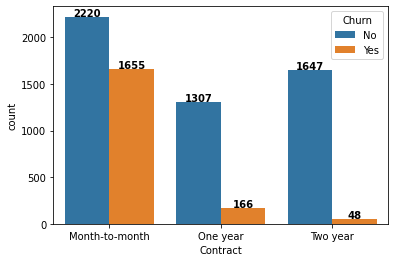

In [ ]:
fig, ax = plt.subplots()

sns.countplot(data=df, x='Contract', hue='Churn', ax=ax)

for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,4), textcoords='offset points', color='black', fontweight='semibold')

plt.show()

In [ ]:
df['Dependents'].value_counts(normalize=True)

No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64

In [ ]:
pd.crosstab(df.Dependents, df.Churn, normalize='index')

Churn,No,Yes
Dependents,,
No,0.687209,0.312791
Yes,0.845498,0.154502


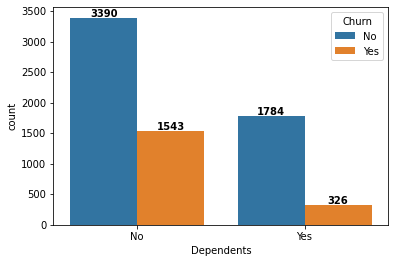

In [ ]:
fig, ax = plt.subplots()

sns.countplot(data=df, x='Dependents', hue='Churn', ax=ax)

for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,4), textcoords='offset points', color='black', fontweight='semibold')

plt.show()

In [ ]:
df['DeviceProtection'].value_counts(normalize=True)

No                     0.439443
Yes                    0.343888
No internet service    0.216669
Name: DeviceProtection, dtype: float64

In [ ]:
pd.crosstab(df.DeviceProtection, df.Churn, normalize='index')

Churn,No,Yes
DeviceProtection,,
No,0.608724,0.391276
No internet service,0.925950,0.074050
Yes,0.774979,0.225021


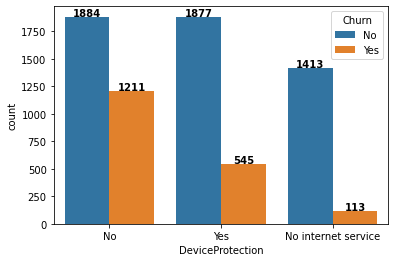

In [ ]:
fig, ax = plt.subplots()

sns.countplot(data=df, x='DeviceProtection', hue='Churn', ax=ax)

for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,4), textcoords='offset points', color='black', fontweight='semibold')

plt.show()

In [ ]:
df['gender'].value_counts(normalize=True)

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

In [ ]:
pd.crosstab(df.gender, df.Churn, normalize='index')

Churn,No,Yes
gender,,
Female,0.730791,0.269209
Male,0.738397,0.261603


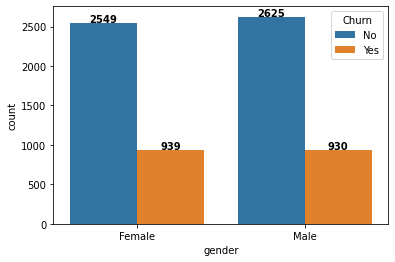

In [ ]:
fig, ax = plt.subplots()

sns.countplot(data=df, x='gender', hue='Churn', ax=ax)

for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,4), textcoords='offset points', color='black', fontweight='semibold')

plt.show()

In [ ]:
df['InternetService'].value_counts(normalize=True)

Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64

In [ ]:
pd.crosstab(df.InternetService, df.Churn, normalize='index')

Churn,No,Yes
InternetService,,
DSL,0.810409,0.189591
Fiber optic,0.581072,0.418928
No,0.925950,0.074050


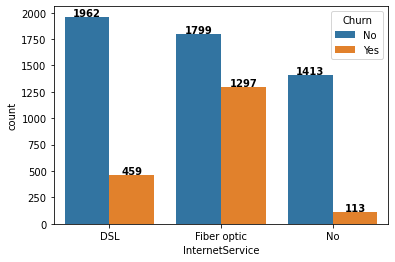

In [ ]:
fig, ax = plt.subplots()

sns.countplot(data=df, x='InternetService', hue='Churn', ax=ax)

for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,4), textcoords='offset points', color='black', fontweight='semibold')

plt.show()

In [ ]:
df['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
114.75     1
103.60     1
113.40     1
57.65      1
113.30     1
Name: MonthlyCharges, Length: 1585, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


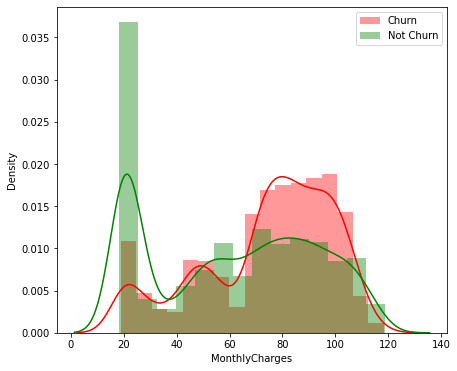

In [ ]:
plt.figure(figsize=(7,6))
sns.distplot(df.MonthlyCharges[df.Churn == 'Yes'], color='r', label='Churn')
sns.distplot(df.MonthlyCharges[df.Churn == 'No'], color='g', label='Not Churn')
plt.legend()
plt.show()

In [ ]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [ ]:
pd.crosstab(df.MultipleLines, df.Churn, normalize='index')

Churn,No,Yes
MultipleLines,,
No,0.749558,0.250442
No phone service,0.750733,0.249267
Yes,0.713901,0.286099


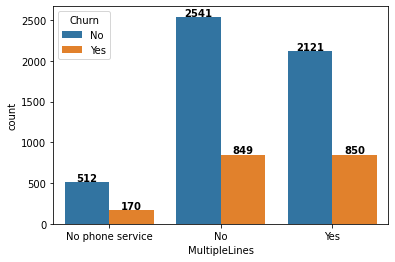

In [ ]:
fig, ax = plt.subplots()

sns.countplot(data=df, x='MultipleLines', hue='Churn', ax=ax)

for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,4), textcoords='offset points', color='black', fontweight='semibold')

plt.show()

In [ ]:
df['OnlineBackup'].value_counts(normalize=True)

No                     0.438450
Yes                    0.344881
No internet service    0.216669
Name: OnlineBackup, dtype: float64

In [ ]:
pd.crosstab(df.OnlineBackup, df.Churn, normalize='index')

Churn,No,Yes
OnlineBackup,,
No,0.600712,0.399288
No internet service,0.925950,0.074050
Yes,0.784685,0.215315


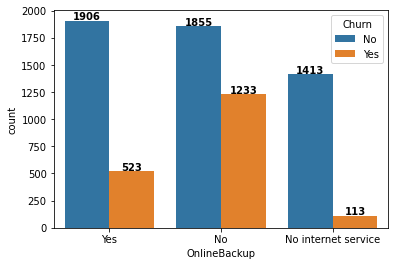

In [ ]:
fig, ax = plt.subplots()

sns.countplot(data=df, x='OnlineBackup', hue='Churn', ax=ax)

for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,4), textcoords='offset points', color='black', fontweight='semibold')

plt.show()

In [ ]:
df['OnlineSecurity'].value_counts(normalize=True)

No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: OnlineSecurity, dtype: float64

In [ ]:
pd.crosstab(df.OnlineSecurity, df.Churn, normalize='index')

Churn,No,Yes
OnlineSecurity,,
No,0.582333,0.417667
No internet service,0.925950,0.074050
Yes,0.853888,0.146112


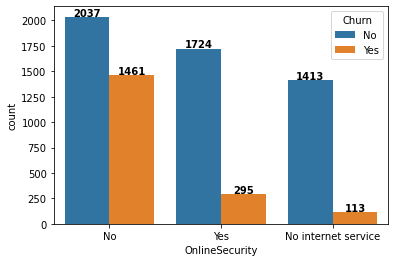

In [ ]:
fig, ax = plt.subplots()

sns.countplot(data=df, x='OnlineSecurity', hue='Churn', ax=ax)

for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,4), textcoords='offset points', color='black', fontweight='semibold')

plt.show()

In [ ]:
df['PaperlessBilling'].value_counts(normalize=True)

Yes    0.592219
No     0.407781
Name: PaperlessBilling, dtype: float64

In [ ]:
pd.crosstab(df.PaperlessBilling, df.Churn, normalize='index')

Churn,No,Yes
PaperlessBilling,,
No,0.836699,0.163301
Yes,0.664349,0.335651


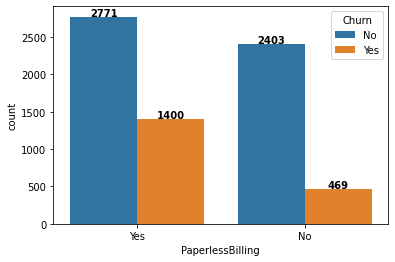

In [ ]:
fig, ax = plt.subplots()

sns.countplot(data=df, x='PaperlessBilling', hue='Churn', ax=ax)

for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,4), textcoords='offset points', color='black', fontweight='semibold')

plt.show()

In [ ]:
df['Partner'].value_counts(normalize=True)

No     0.516967
Yes    0.483033
Name: Partner, dtype: float64

In [ ]:
pd.crosstab(df.Partner, df.Churn, normalize='index')

Churn,No,Yes
Partner,,
No,0.670420,0.329580
Yes,0.803351,0.196649


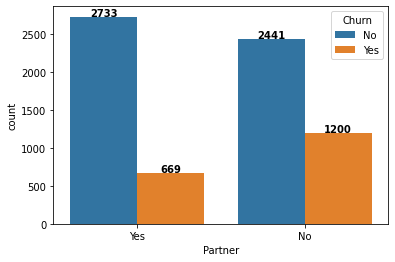

In [ ]:
fig, ax = plt.subplots()

sns.countplot(data=df, x='Partner', hue='Churn', ax=ax)

for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,4), textcoords='offset points', color='black', fontweight='semibold')

plt.show()

In [ ]:
df['PaymentMethod'].value_counts(normalize=True)

Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: PaymentMethod, dtype: float64

In [ ]:
pd.crosstab(df.PaymentMethod, df.Churn, normalize='index')

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.832902,0.167098
Credit card (automatic),0.847569,0.152431
Electronic check,0.547146,0.452854
Mailed check,0.808933,0.191067


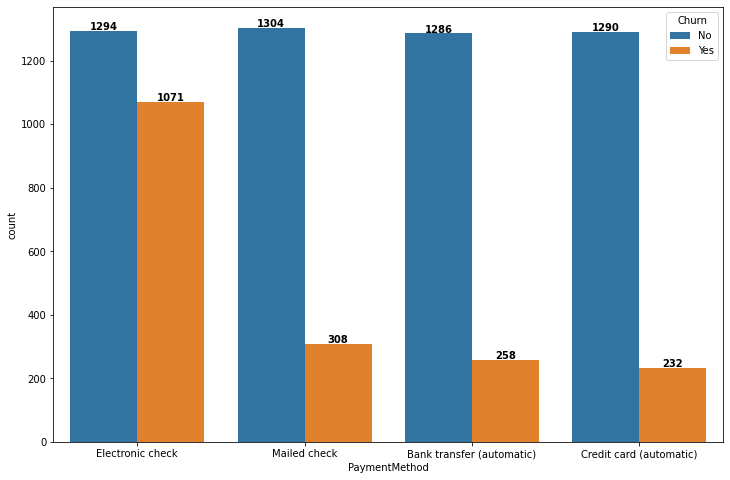

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

sns.countplot(data=df, x='PaymentMethod', hue='Churn', ax=ax)

for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,4), textcoords='offset points', color='black', fontweight='semibold')

plt.show()

In [ ]:
df['PhoneService'].value_counts(normalize=True)

Yes    0.903166
No     0.096834
Name: PhoneService, dtype: float64

In [ ]:
pd.crosstab(df.PhoneService, df.Churn, normalize='index')

Churn,No,Yes
PhoneService,,
No,0.750733,0.249267
Yes,0.732904,0.267096


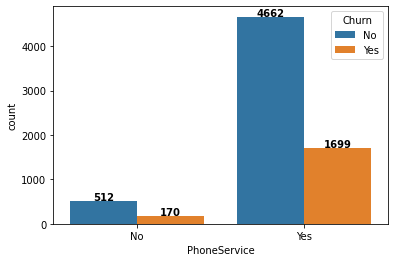

In [ ]:
fig, ax = plt.subplots()

sns.countplot(data=df, x='PhoneService', hue='Churn', ax=ax)

for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,4), textcoords='offset points', color='black', fontweight='semibold')

plt.show()

In [ ]:
df['SeniorCitizen'].value_counts(normalize=True)

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

In [ ]:
pd.crosstab(df.SeniorCitizen, df.Churn, normalize='index')

Churn,No,Yes
SeniorCitizen,,
0,0.763938,0.236062
1,0.583187,0.416813


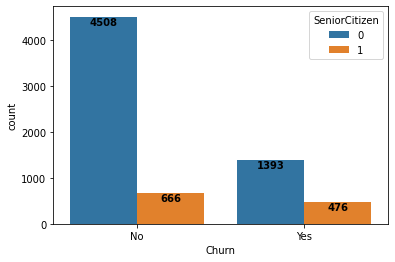

In [ ]:
fig, ax = plt.subplots()

sns.countplot(data=df, x='Churn', hue='SeniorCitizen', ax=ax)

for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-5), textcoords='offset points', color='black', fontweight='semibold')

plt.show()

In [ ]:
df['StreamingMovies'].value_counts(normalize=True)

No                     0.395428
Yes                    0.387903
No internet service    0.216669
Name: StreamingMovies, dtype: float64

In [ ]:
pd.crosstab(df.StreamingMovies, df.Churn, normalize='index')

Churn,No,Yes
StreamingMovies,,
No,0.663196,0.336804
No internet service,0.925950,0.074050
Yes,0.700586,0.299414


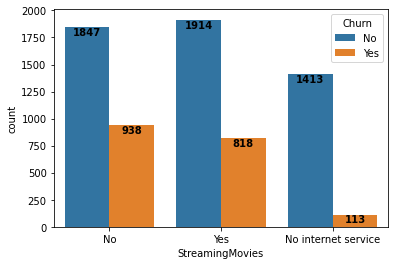

In [ ]:
fig, ax = plt.subplots()

sns.countplot(data=df, x='StreamingMovies', hue='Churn', ax=ax)

for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-5), textcoords='offset points', color='black', fontweight='semibold')

plt.show()

In [ ]:
df['StreamingTV'].value_counts(normalize=True)

No                     0.398978
Yes                    0.384353
No internet service    0.216669
Name: StreamingTV, dtype: float64

In [ ]:
pd.crosstab(df.StreamingTV, df.Churn, normalize='index')

Churn,No,Yes
StreamingTV,,
No,0.664769,0.335231
No internet service,0.925950,0.074050
Yes,0.699298,0.300702


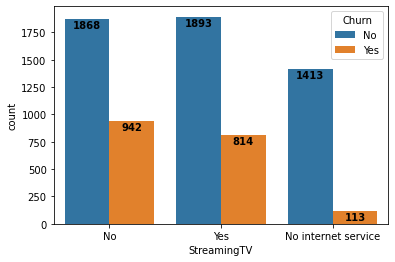

In [ ]:
fig, ax = plt.subplots()

sns.countplot(data=df, x='StreamingTV', hue='Churn', ax=ax)

for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-6), textcoords='offset points', color='black', fontweight='semibold')

plt.show()

In [ ]:
df['TechSupport'].value_counts(normalize=True)

No                     0.493114
Yes                    0.290217
No internet service    0.216669
Name: TechSupport, dtype: float64

In [ ]:
pd.crosstab(df.TechSupport, df.Churn, normalize='index')

Churn,No,Yes
TechSupport,,
No,0.583645,0.416355
No internet service,0.925950,0.074050
Yes,0.848337,0.151663


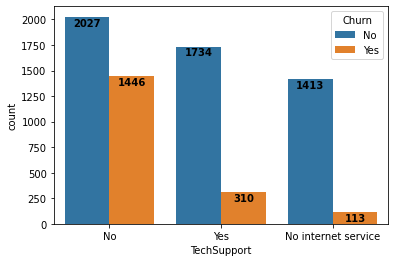

In [ ]:
fig, ax = plt.subplots()

sns.countplot(data=df, x='TechSupport', hue='Churn', ax=ax)

for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,-6), textcoords='offset points', color='black', fontweight='semibold')

plt.show()

In [ ]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [ ]:
df['tenure'].max()

72

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


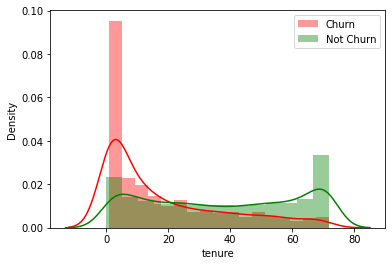

In [ ]:
plt.figure(figsize=(6,4))
sns.distplot(df.tenure[df.Churn == 'Yes'], color='r', label='Churn')
sns.distplot(df.tenure[df.Churn == 'No'], color='g', label='Not Churn')
plt.legend()
plt.show()

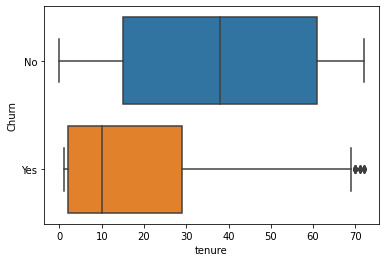

In [ ]:
sns.boxplot(data=df, x='tenure', y='Churn')
plt.show()

In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [ ]:
df['TotalCharges'].value_counts()

20.20      11
19.75       9
19.65       8
20.05       8
19.90       8
           ..
1066.15     1
249.95      1
8333.95     1
7171.70     1
1024.00     1
Name: TotalCharges, Length: 6530, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


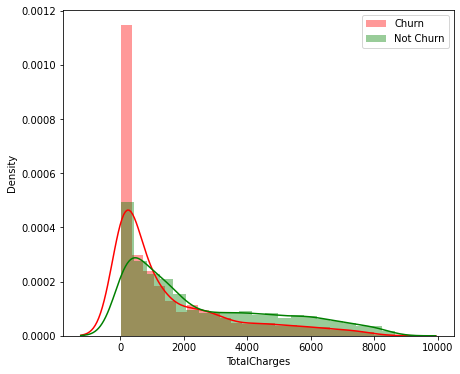

In [ ]:
plt.figure(figsize=(7,6))
sns.distplot(df.TotalCharges[df.Churn == 'Yes'], color='r', label='Churn')
sns.distplot(df.TotalCharges[df.Churn == 'No'], color='g', label='Not Churn')
plt.legend()
plt.show()

In [ ]:
df.TotalCharges.max()

8684.8

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

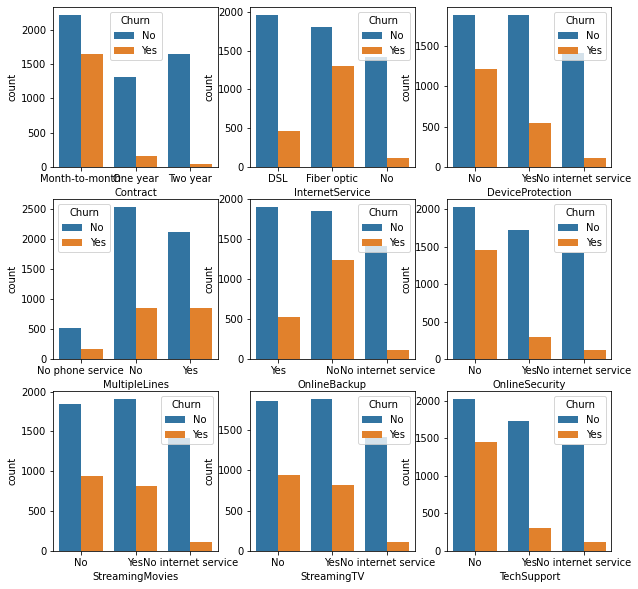

In [ ]:
cat_var = ['Contract', 'InternetService', 'DeviceProtection',
           'MultipleLines', 'OnlineBackup', 'OnlineSecurity',
           'StreamingMovies', 'StreamingTV', 'TechSupport']
fig, axes = plt.subplots(3,3, figsize=(10,10))
for cat, ax in zip(cat_var, axes.flatten()):
  sns.countplot(cat, data=df, hue='Churn', ax=ax)
